In [1]:
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install pyarrow


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
df_jan = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df_feb = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')

# Q1. Downloading the data

In [4]:
df_jan.shape[1]

19

# Q2. Computing duration

In [5]:
df_jan['duration'] = df_jan.tpep_dropoff_datetime - df_jan.tpep_pickup_datetime
df_jan.duration = df_jan.duration.apply(lambda td: td.total_seconds() / 60)
std_duration = df_jan.duration.std()
std_duration

np.float64(42.59435124195458)

# Q3. Dropping outliers

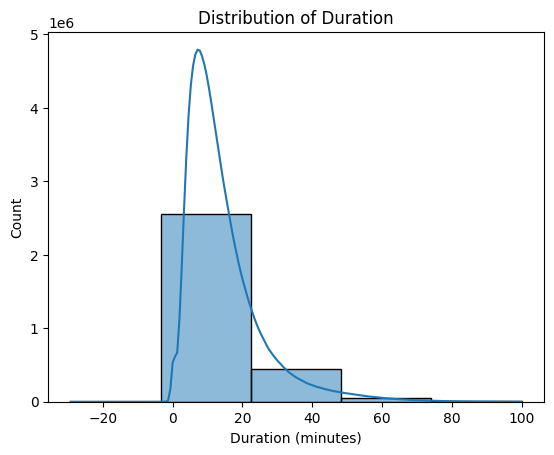

In [6]:
sns.histplot(df_jan[df_jan.duration < 100].duration, bins=5, kde=True)
plt.xlabel("Duration (minutes)")
plt.title("Distribution of Duration")
plt.show()

In [7]:
row_original = df_jan.shape[0]
row_original

3066766

In [8]:

df_jan = df_jan[(df_jan.duration >= 1) & (df_jan.duration <= 60)]

row_filtered= df_jan.shape[0]
fraction = (row_filtered / row_original) * 100.0
fraction

98.1220282212598

# Q4. One-hot encoding

In [9]:
features = ['PULocationID', 'DOLocationID']
df_jan[features] = df_jan[features].astype(str)
train_dicts = df_jan[features].to_dict(orient='records')

In [10]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [11]:
X_train.shape

(3009173, 515)

In [12]:
target = 'duration'
y_train = df_jan[target].values
y_train

array([ 8.43333333,  6.31666667, 12.75      , ..., 24.51666667,
       13.        , 14.4       ], shape=(3009173,))

# Q5. Training a model

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = lr.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
rmse

np.float64(7.6492624397080675)

# Q6. Evaluating the model

In [15]:
df_feb['duration'] = df_feb.tpep_dropoff_datetime - df_feb.tpep_pickup_datetime
df_feb.duration = df_feb.duration.apply(lambda td: td.total_seconds() / 60)

In [16]:
df_feb = df_feb[(df_feb.duration >= 1) & (df_feb.duration <= 60)]

In [17]:
df_feb[features] = df_feb[features].astype(str)
val_dicts = df_feb[features].to_dict(orient='records')

In [18]:
X_val = dv.transform(val_dicts)

y_val = df_feb[target].values

In [19]:
X_val.shape

(2855951, 515)

In [20]:
y_val_pred = lr.predict(X_val)

In [21]:
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
rmse

np.float64(7.81181211389241)